In [115]:
import pandas
import numpy as np
import uproot
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint
import gc
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [2]:
#file_name = '../../../tuples/results/DY_amcatnloFXFX_part1.root'
#file_name = '../../../tuples/results/TTTo2L2Nu_test_part1.root'
#file_name = '../../../tuples/results/TTToHadronic_PSweights_part1.root'
#file_name = '../../../tuples/results/TTToSemiLeptonic_PSweights_part1.root'
#file = uproot.open(file_name)

#file_name = '../../results/0607_all/DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8.hdf5'
#file_name = '../../results/0607_all/TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8.hdf5'
#file_name = '../../results/0607_all/TTToHadronic_TuneCP5_PSweights_13TeV-powheg-pythia8.hdf5'
#file_name = '../../results/0607_all/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8.hdf5'

#folder='../../results/0607_all'
folder='../../results/0610_s3/'
file_name = folder + 'DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8.hdf5'
#file_name = folder + 'TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8.hdf5'
#file_name = folder + 'TTToHadronic_TuneCP5_PSweights_13TeV-powheg-pythia8.hdf5'
#file_name = folder + 'TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8.hdf5'


#file_name = '../../results/DY_s3.hdf5'
#file_name = '../../results/TT_had_s3.hdf5'
#file_name = '../../results/TT_lep_s2.hdf5'
#file_name = '../../results/TT_semi_s2.hdf5'
df = pandas.read_hdf(file_name)

In [3]:
df_qcd = pandas.read_hdf(folder + 'ZeroBias.hdf5')

In [13]:
#df = file['taus'].arrays(outputtype=pandas.DataFrame)
#df.columns = [ c.decode('utf-8') for c in df.columns ]

In [3]:
df_taus = df[df['gen_tau'] == 1].copy(deep=True)

In [4]:
del df
gc.collect()

111

In [6]:
df = df.append(df_taus)

In [7]:
del df_taus
gc.collect()

97

In [4]:
def ProcessDF(df):
    df['tau_vs_jet'] = pandas.Series(df['deepId_tau'] / (df['deepId_tau'] + df['deepId_jet']), index=df.index)
    df['tau_vs_mu'] = pandas.Series(df['deepId_tau'] / (df['deepId_tau'] + df['deepId_mu']), index=df.index)
    df['tau_vs_e'] = pandas.Series(df['deepId_tau'] / (df['deepId_tau'] + df['deepId_e']), index=df.index)
    df['tau_vs_all'] = pandas.Series(df['deepId_tau']
                                     / (df['deepId_tau'] + df['deepId_e'] + df['deepId_mu'] + df['deepId_jet']), index=df.index)

In [6]:
ProcessDF(df)
ProcessDF(df_qcd)

In [7]:
#presel = (df['pt'] > 20) & (df['pt'] <= 100) & (np.abs(df['eta']) < 2.3)
presel = (df['pt'] > 20) & (np.abs(df['eta']) < 2.3)

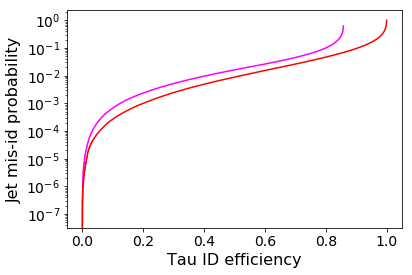

In [5]:
df_tj = df[((df['gen_tau'] == True) | (df['gen_jet'] == True)) & presel]
fpr_ref, tpr_ref, thresholds_ref = metrics.roc_curve(df_tj['gen_tau'], df_tj['refId_jet'])
fpr, tpr, thresholds = metrics.roc_curve(df_tj['gen_tau'], df_tj['tau_vs_jet'])
plt.semilogy(tpr_ref[:-1], fpr_ref[:-1], 'magenta', tpr, fpr, 'red')
#plt.ylim([0,0.2])
#plt.xlim([.4, 0.8])
plt.xlabel('Tau ID efficiency', fontsize=16)
plt.ylabel('Jet mis-id probability', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('tau_vs_jet.pdf', bbox_inches='tight')

In [8]:
def FindThresholds(df, var_name, pt_bins, target_eff):
    thr = np.zeros(len(pt_bins) - 1)
    for n in range(0, len(thr)):
        x = df[(df['gen_tau']== 1) & (df['pt'] > pt_bins[n]) & (df['pt'] <= pt_bins[n+1]) & (np.abs(df['eta']) < 2.3)]
        thr[n] = np.percentile(x[var_name], (1-target_eff) * 100)
    return thr

In [9]:
def FindThreshold(df, var_name, target_eff):
    x = df[(df['gen_tau']== 1) & (df['pt'] > 20) & (np.abs(df['eta']) < 2.3)]
    return np.percentile(x[var_name], (1-target_eff) * 100)

In [95]:
def efficiency(x, thrs):
    N = x.shape[0]
    eff = np.zeros(thrs.shape[0])
    eff_down = np.zeros(thrs.shape[0])
    eff_up = np.zeros(thrs.shape[0])
    if N != 0:
        for k in range(thrs.shape[0]):
            n = np.count_nonzero(x > thrs[k])
            eff[k] = n/N
            eff_down[k], eff_up[k] = proportion_confint(n, N, 1-0.682689, 'beta')
    return eff, eff_down, eff_up

In [54]:
np.pad(np.reshape(thr_jet, (1, thr_jet.shape[0]))

array([[0.98591255, 0.97596037, 0.96352462, 0.94638843, 0.91402453,
        0.86230134, 0.76448975, 0.53290597]])

In [51]:
np.pad(thr_jet, ((0, 2)),'edge')

array([0.98591255, 0.97596037, 0.96352462, 0.94638843, 0.91402453,
       0.86230134, 0.76448975, 0.53290597, 0.53290597, 0.53290597])

In [21]:
%load_ext Cython

In [36]:
%%cython
import numpy as np
def rate_curve(df, variables, thresholds):
    rates = np.zeros(thresholds.shape)
    events = df.groupby(['run', 'lumi', 'evt'])
    print("before n: ", df.shape[0])
    n_events = len(events)
    print("N done:", n_events)
    for v in range(0, len(variables)):
        var = variables[v]
        x = events[var].max()
        for k in range(0, thresholds.shape[0]):
            n_passed = np.count_nonzero(x > thresholds[k, v])
            rates[k, v] = float(n_passed) / n_events
    return rates

In [29]:
np.unique(df_qcd.evt).shape

(3087490,)

In [34]:
df_qcd.sort_values(by=['run', 'lumi', 'evt'], inplace=True)

In [40]:
len(df_qcd.groupby(['run', 'lumi', 'evt']))

3090241

In [13]:
def efficiency_curve(x, n_bins):
    eff = np.linspace(0, 1, num=n_bins)
    thr = np.percentile(x, (1-eff) * 100)
    return eff, thr

In [37]:
def rate_eff_curve(df_rate, df_eff, variables, n_bins):
    eff = np.zeros((n_bins, len(variables)))
    thr = np.zeros(eff.shape)
    for v in range(0, len(variables)):
        var = variables[v]
        eff[:, v], thr[:, v] = efficiency_curve(df_eff[var], n_bins)
    rates = rate_curve(df_rate, variables, thr)
    return rates, eff, thr

In [55]:
fpr, tpr, thresholds = rate_eff_curve(df_qcd[(df_qcd['pt'] > 20) & (np.abs(df_qcd['eta']) < 2.3)],
                                      df[(df['gen_tau'] == True) & (df['pt'] > 20) & (np.abs(df['eta']) < 2.3)],
                                      ['refId_jet', 'tau_vs_jet', 'tau_vs_all'], 100)

before n:  2377833
N done: 2106880


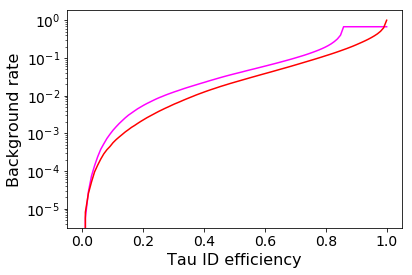

In [56]:
plt.semilogy(tpr[:, 0], fpr[:, 0], 'magenta', tpr[:, 1], fpr[:, 2], 'red')
#plt.ylim([0,0.2])
#plt.xlim([.4, 0.8])
plt.xlabel('Tau ID efficiency', fontsize=16)
plt.ylabel('Background rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('ZeroBias_rate.pdf', bbox_inches='tight')

In [46]:

thr_effs = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
thr_jet = FindThreshold(df, 'tau_vs_jet', thr_effs)
print(thr_jet)

[0.98591255 0.97596037 0.96352462 0.94638843 0.91402453 0.86230134
 0.76448975 0.53290597]


In [103]:
def diff_efficiency(df_true, df_fake, var_name, var_bins, thrs, discr_name):
    eff = np.zeros([len(var_bins)-1, 2, thrs.shape[0]])
    eff_up = np.zeros(eff.shape)
    eff_down = np.zeros(eff.shape)
    for n in range(0, len(var_bins) - 1):
        x_true = df_true[(df_true[var_name] > var_bins[n]) & (df_true[var_name] <= var_bins[n+1])
                         & (np.abs(df_true['eta']) < 2.3)][discr_name]
        x_fake = df_fake[(df_fake[var_name] > var_bins[n]) & (df_fake[var_name] <= var_bins[n+1])
                          & (np.abs(df_fake['eta']) < 2.3)][discr_name]
        eff[n, 0, :], eff_down[n, 0, :], eff_up[n, 0, :] = efficiency(x_true, thrs)
        eff[n, 1, :], eff_down[n, 1, :], eff_up[n, 1, :] = efficiency(x_fake, thrs)
    eff_up = eff_up - eff
    eff_down = eff - eff_down
    return eff, eff_up, eff_down

In [106]:
def draw_diff_eff(eff, eff_up, eff_down, var_bins, thrs, x_title, y1_title, y2_title, output_file_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
    for k in range(thrs.shape[0]):
        ax1.errorbar((var_bins[1:]+var_bins[0:-1])/2, eff[:, 0, k], xerr=((var_bins[1:]-var_bins[0:-1])/2),
                     yerr=[eff_up[:, 0, k], eff_down[:, 0, k]], linestyle='None')
        ax2.errorbar((var_bins[1:]+var_bins[0:-1])/2, eff[:, 1, k], xerr=((var_bins[1:]-var_bins[0:-1])/2),
                     yerr=[eff_up[:, 1, k], eff_down[:, 1, k]], linestyle='None')
    ax1.set_xlim([var_bins[0], var_bins[-1]])
    ax1.set_xlabel(x_title, fontsize=16)
    ax1.set_ylabel(y1_title, fontsize=16)

    ax2.set_xlim([var_bins[0], var_bins[-1]])
    ax2.set_ylim([1e-5, 1])
    ax2.set_yscale('log')
    ax2.set_xlabel(x_title, fontsize=16)
    ax2.set_ylabel(y2_title, fontsize=16)

    plt.show()
    fig.savefig(output_file_name, bbox_inches='tight')

In [89]:
pt = np.array([20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300, 350, 400])
eff_pt, eff_pt_up, eff_pt_down = diff_efficiency(df[(df['gen_tau']== 1)], df_qcd, 'pt', pt, thr_jet, 'tau_vs_jet')

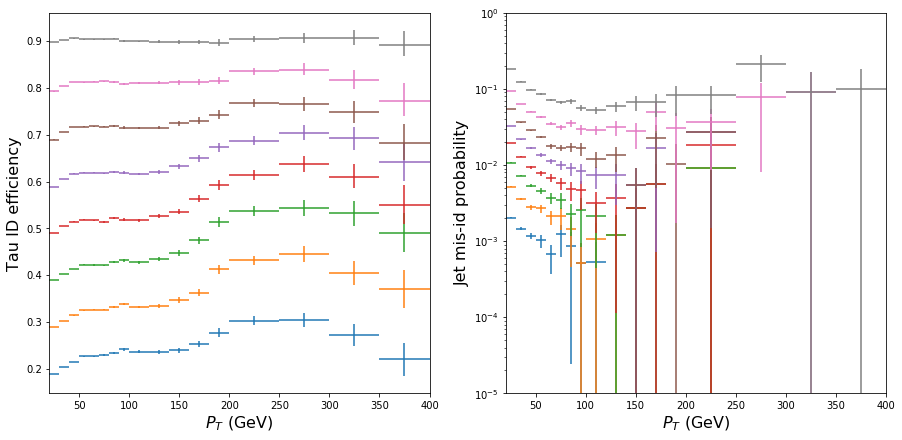

In [91]:
draw_diff_eff(eff_pt, eff_pt_up, eff_pt_down, pt, thr_jet, '$P_{T}$ (GeV)', 'Tau ID efficiency', 'Jet mis-id probability',
             'ZeroBias_eff_rate_pt.pdf')

In [104]:
eta = np.arange(-2.3, 2.31, 0.2)
eff_eta, eff_eta_up, eff_eta_down = diff_efficiency(df[(df['gen_tau']== 1)], df_qcd, 'eta', eta, thr_jet, 'tau_vs_jet')

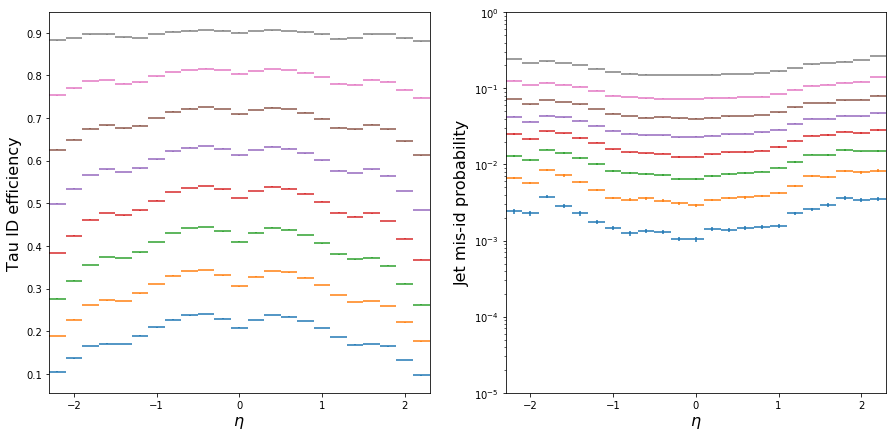

In [107]:
draw_diff_eff(eff_eta, eff_eta_up, eff_eta_down, eta, thr_jet, '$\eta$', 'Tau ID efficiency', 'Jet mis-id probability',
             'ZeroBias_eff_rate_eta.pdf')

In [108]:
phi = np.arange(-3.14, 3.141, 6.28/20)
eff_phi, eff_phi_up, eff_phi_down = diff_efficiency(df[(df['gen_tau']== 1)], df_qcd, 'phi', phi, thr_jet, 'tau_vs_jet')

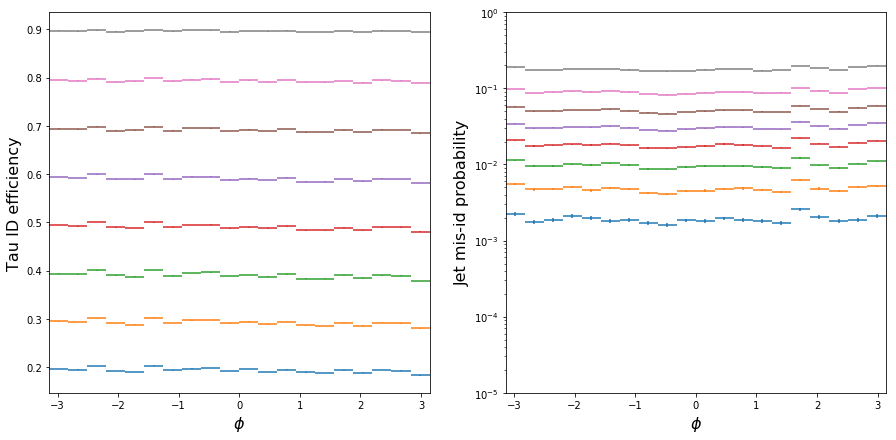

In [109]:
draw_diff_eff(eff_phi, eff_phi_up, eff_phi_down, phi, thr_jet, '$\phi$', 'Tau ID efficiency', 'Jet mis-id probability',
             'ZeroBias_eff_rate_phi.pdf')

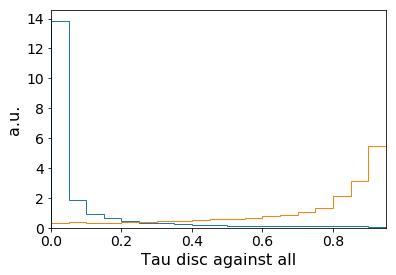

In [120]:
bins = np.arange(0, 1, 0.05)
#bins = np.arange(0, 2, 0.1)
#x = df[(df['gen_tau']== 1) &(df['pt'] > 20) & (df['pt'] <= 30) & (np.abs(df['eta']) < 2.3)]
sel = (df['pt'] > 20) & (np.abs(df['eta']) < 2.3)
#plt.hist(x['tau_vs_jet'], bins=bins)
plt.hist(df[(df['gen_tau'] != 1) & sel]['tau_vs_all'], bins=bins, histtype='step', stacked=True, fill=False, density=True)
plt.hist(df[(df['gen_tau'] == 1) & sel]['tau_vs_all'], bins=bins, histtype='step', stacked=True, fill=False, density=True)
#plt.hist(df['pt'], bins=bins, weights=df['weight'])
#plt.hist(df[(df['gen_tau']== 1) & (df['pt'] < 30) & (df['pt'] > 20)]['weight'], bins=bins)
#plt.hist(df[(df['gen_tau']== 1)]['weight'], bins=bins)
plt.xlim([bins[0], bins[-1]])
plt.xlabel('Tau disc against all', fontsize=16)
plt.ylabel('a.u.', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('DY_tau_vs_all_hist.pdf', bbox_inches='tight')

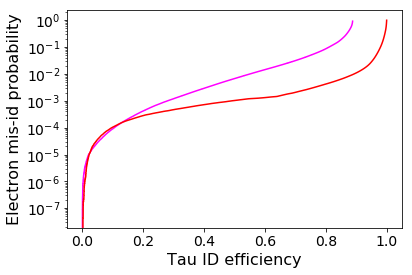

In [6]:
df_et = df[((df['gen_tau'] == True) | (df['gen_e'] == True)) & presel]
fpr_ref, tpr_ref, thresholds_ref = metrics.roc_curve(df_et['gen_tau'], df_et['refId_e'])
fpr, tpr, thresholds = metrics.roc_curve(df_et['gen_tau'], df_et['tau_vs_e'])
plt.semilogy(tpr_ref[:-1], fpr_ref[:-1], 'magenta', tpr, fpr, 'red')
#plt.ylim([0,0.2])
#plt.xlim([.4, 0.8])
plt.xlabel('Tau ID efficiency', fontsize=16)
plt.ylabel('Electron mis-id probability', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('tau_vs_ele.pdf', bbox_inches='tight')

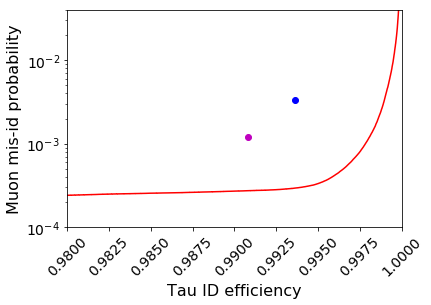

In [9]:
df_mt = df[((df['gen_tau'] == True) | (df['gen_mu'] == True)) & presel]
fpr_ref, tpr_ref, thresholds_ref = metrics.roc_curve(df_mt['gen_tau'], df_mt['refId_mu_loose'])
fpr_ref_2, tpr_ref_2, thresholds_ref_2 = metrics.roc_curve(df_mt['gen_tau'], df_mt['refId_mu_tight'])
fpr, tpr, thresholds = metrics.roc_curve(df_mt['gen_tau'], df_mt['tau_vs_mu'])
plt.semilogy(tpr_ref[1:2], fpr_ref[1:2], 'bo', tpr_ref_2[1:2], fpr_ref_2[1:2], 'mo', tpr, fpr, 'red')
plt.ylim([1e-4, 0.04])
plt.xlim([.98, 1])
plt.xlabel('Tau ID efficiency', fontsize=16)
plt.ylabel('Muon mis-id probability', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.savefig('tau_vs_mu.pdf', bbox_inches='tight')